## FRAUD DETECTION

Fraud detection can be formulated as a supervised model which classify if a transaction is good or not.  

### **IMPORT MODULES**

In [40]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import plotly.graph_objects as go

from  imblearn.over_sampling import SMOTE

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings("ignore")


### **IMPORT DATASET**

Dataset is made up of the following fields:
- _step_: hour.
- _type_: type of transaction.
- _amount_: amount of money involved in the transaction.
- _nameOrig_: id of who made the transaction.
- _oldbalanceOrig_: balance of who made the transaction before the transaction.
- _newbalanceOrig_:  balance of who made the transaction after the transaction.
- _nameDest_: id of who receives the transaction.
- _oldbalanceOrig_: balance of who receive the transaction before the transaction.
- _newbalanceOrig_:  balance of who receive the transaction after the transaction.
- _isFraud_: label.
- _isFlaggedFraud_: hypothesis of transaction.

In [41]:
df  =  pd.read_csv('PS_20174392719_1491204439457_log.csv', nrows = 5000)

In [42]:
df.shape

(5000, 11)

In [43]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [44]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,5000.000000,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5.000000e+03,5000.000000,5000.0
mean,1.891400,1.015176e+05,1.042543e+06,1.064338e+06,9.181536e+05,1.064912e+06,0.008000,0.0
std,1.175705,3.009623e+05,2.301986e+06,2.343680e+06,2.541759e+06,2.921892e+06,0.089093,0.0
min,1.000000,6.420000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
25%,1.000000,3.734922e+03,5.722500e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.0
50%,1.000000,1.095855e+04,2.655056e+04,1.814185e+04,0.000000e+00,0.000000e+00,0.000000,0.0
75%,3.000000,1.086046e+05,2.957183e+05,3.003207e+05,3.638475e+05,2.701108e+05,0.000000,0.0
max,5.000000,1.000000e+07,1.293042e+07,1.301050e+07,1.951612e+07,1.916920e+07,1.000000,0.0


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            5000 non-null   int64  
 1   type            5000 non-null   object 
 2   amount          5000 non-null   float64
 3   nameOrig        5000 non-null   object 
 4   oldbalanceOrg   5000 non-null   float64
 5   newbalanceOrig  5000 non-null   float64
 6   nameDest        5000 non-null   object 
 7   oldbalanceDest  5000 non-null   float64
 8   newbalanceDest  5000 non-null   float64
 9   isFraud         5000 non-null   int64  
 10  isFlaggedFraud  5000 non-null   int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 429.8+ KB


### **PREPROCESSING**

In [46]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

<AxesSubplot:>

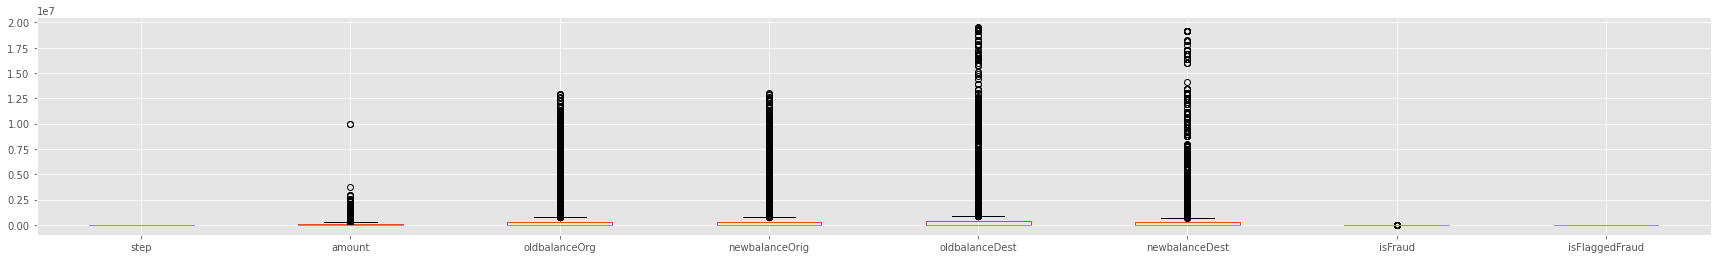

In [47]:
df.boxplot(figsize = (30, 4))

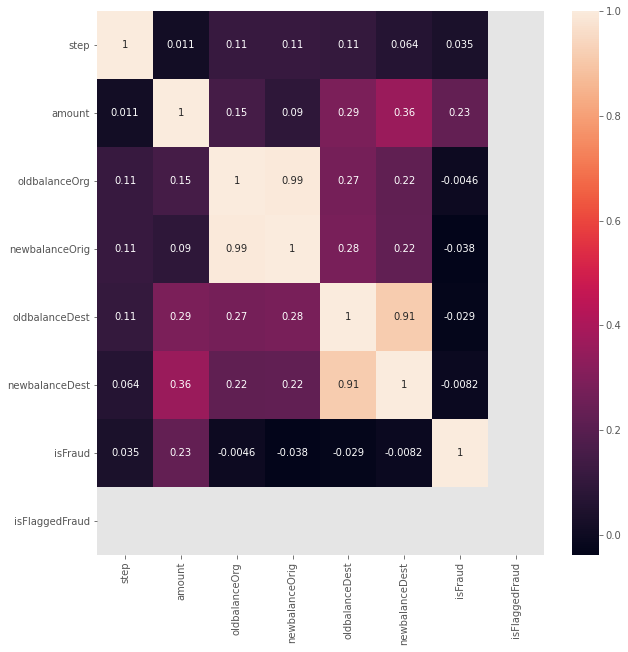

In [48]:
plt.figure(figsize = (10,  10))
sns.heatmap(df.corr(), annot = True)
plt.show();

# it seems that the fraud field doesn't show some intereting correlation with other fields.

In [49]:
df.drop(['oldbalanceOrg', 'oldbalanceDest'], axis = 1)

,step,type,amount,nameOrig,newbalanceOrig,nameDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,160296.36,M1979787155,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,19384.72,M2044282225,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,0.00,C553264065,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,0.00,C38997010,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,29885.86,M1230701703,0.00,0,0
...,...,...,...,...,...,...,...,...,...
4995,5,CASH_IN,67017.13,C1000600589,4009561.32,C1163619825,51827.53,0,0
4996,5,CASH_IN,122744.28,C277549599,4132305.60,C1850042097,84362.06,0,0
4997,5,CASH_IN,414729.24,C1185631996,4547034.84,C991505714,1695079.69,0,0
4998,5,CASH_IN,328776.10,C804559024,4875810.94,C977993101,962737.60,0,0


In [50]:
# group by labels. 
# the flagged fraud is the baseline.

df_pivot = pd.pivot_table(df, index = ['type'], values = ['isFraud', 'isFlaggedFraud'], aggfunc = [np.sum], margins = True)
df_pivot

sum        
         isFlaggedFraud isFraud
type                           
CASH_IN               0       0
CASH_OUT              0      21
DEBIT                 0       0
PAYMENT               0       0
TRANSFER              0      19
All                   0      40

In [51]:
df = pd.concat([df, pd.get_dummies(df['type'], prefix = 'type_')], axis = 1)
df.drop(['type', 'nameOrig', 'nameDest'], inplace = True, axis = 1)

In [52]:
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type__CASH_IN,type__CASH_OUT,type__DEBIT,type__PAYMENT,type__TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,0,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,0,0,1,0


In [53]:
# normalization.

# python see a dataframe as a set of columns. 
df_scaled = (df - df.min())/(df.max() - df.min())
df_scaled.isFlaggedFraud = df.isFlaggedFraud

In [128]:
# train and test split.

X = df.drop(['isFraud'], axis = 1)
y = df.isFraud

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 1)

### **CLASS IMBALANCE**

In general, when a supervised anomaly detection is carried out, the positive class has a few examples. For this reason, there are some techniques which can help us to build a kind of balance between classes:
 -  _Oversample_: add more value to the minority class. It must be done after the splitting procedure in order to avoid a data leak between train and test set.One example is SMOTE.
 -  _Undersample_: remove data from the most popular class.
 - _Costs_ which differs on the basis of the chosen classes.
 
 SMOTE methods combines the first two aproaches, as described in https://arxiv.org/pdf/1106.1813.pdf. The main idea is to interpolate new data from the ground truth, so sampling with replacement doeasn't occur.
 

#### **BEFORE SMOTE**

In [129]:
# anomalies are rare event. So, class imbalance could be a problem, especially in an unsupervised task.
# The problem is that models would label as not fraud transactions that would be ->  the main risk
# is to obtain a lot of false negatives.

print(f"Fraud: {sum(y_train == 1)/len(y_train) * 100}")
print(f"Not Fraud: {sum(y_train == 0)/len(y_train) * 100}")

Fraud: 0.9428571428571428
Not Fraud: 99.05714285714285


In [130]:
# Building model: 

models = {
    'MLP': MLPClassifier(),
    'RadomForest': RandomForestClassifier(random_state = 1234),
    'DecisionTree': DecisionTreeClassifier(random_state = 1234),
    'KNN': KNeighborsClassifier()
}


for key, item in models.items():
    result = cross_val_score(item, X_train, y_train, cv=10, scoring ='accuracy').mean() 
    print(f"{key}: {result} " )

MLP: 0.9588571428571429 
RadomForest: 0.9951428571428572 
DecisionTree: 0.9928571428571429 
KNN: 0.9914285714285714 


In [131]:
models['RadomForest'].fit(X_train, y_train)
y_pred = models['RadomForest'].predict(X_test)

# Model Evaluation 
print(classification_report(y_test, y_pred, target_names=['Not Fraud','Fraud']))

              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00      1493
       Fraud       0.86      0.86      0.86         7

    accuracy                           1.00      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       1.00      1.00      1.00      1500



In [132]:
y_test = y_test.reset_index(drop = True)
y_pred = pd.Series(y_pred)

In [133]:
y_test[y_test == 1]

51      1
228     1
235     1
430     1
1142    1
1151    1
1317    1
Name: isFraud, dtype: int64

In [134]:
y_pred[y_pred == 1]

51      1
228     1
430     1
620     1
1142    1
1151    1
1317    1
dtype: int64

#### **AFTER SMOTE**

In [122]:
# only the training sample must be resampled!! It is so important 
# this point because the test set is irrelevant.

sm = SMOTE(random_state = 1234)
X_train, y_train = sm.fit_resample(X_train, y_train)

print(f"Fraud: {sum(y_train == 1)/len(y_train) * 100}")
print(f"Not Fraud: {sum(y_train == 0)/len(y_train) * 100}")

Fraud: 50.0
Not Fraud: 50.0


In [123]:
# Building model: 

models = {
    'MLP': MLPClassifier(),
    'RadomForest': RandomForestClassifier(random_state = 1234),
    'DecisionTree': DecisionTreeClassifier(random_state = 1234),
#     'SVC': SVC(kernel='linear', random_state = 1234),
    'KNN': KNeighborsClassifier()
}


for key, item in models.items():
    result = cross_val_score(item, X_train, y_train, cv=10, scoring ='accuracy').mean() 
    print(f"{key}: {result} " )

MLP: 0.9601949923275571 
RadomForest: 0.9974036370289971 
DecisionTree: 0.9952407982667347 
KNN: 0.9808186849973592 


In [136]:
models['RadomForest'].fit(X_train, y_train)
y_pred = models['RadomForest'].predict(X_test)

# Model Evaluation 
print(classification_report(y_test, y_pred, target_names=['!Fraud','Fraud']))

# recall highlights that the majority of fraud points are detected but
# with this method, a lot of more positives are spotted.
# even if this method is more general and it is preferable, it performs worse 
# then the one obtained by the previous. 

              precision    recall  f1-score   support

      !Fraud       1.00      1.00      1.00      1493
       Fraud       0.86      0.86      0.86         7

    accuracy                           1.00      1500
   macro avg       0.93      0.93      0.93      1500
weighted avg       1.00      1.00      1.00      1500



In [125]:
y_test = y_test.reset_index(drop = True)
y_pred = pd.Series(y_pred)

In [126]:
y_test[y_test == 1]

51      1
228     1
235     1
430     1
1142    1
1151    1
1317    1
Name: isFraud, dtype: int64

In [127]:
y_pred[y_pred == 1]

51      1
129     1
228     1
430     1
499     1
620     1
714     1
1108    1
1142    1
1151    1
1223    1
1317    1
dtype: int64